In [2]:
import numpy as np

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.exposure
import skimage.measure
import skimage.segmentation

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

/Users/arman/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


<class 'numpy.ndarray'>


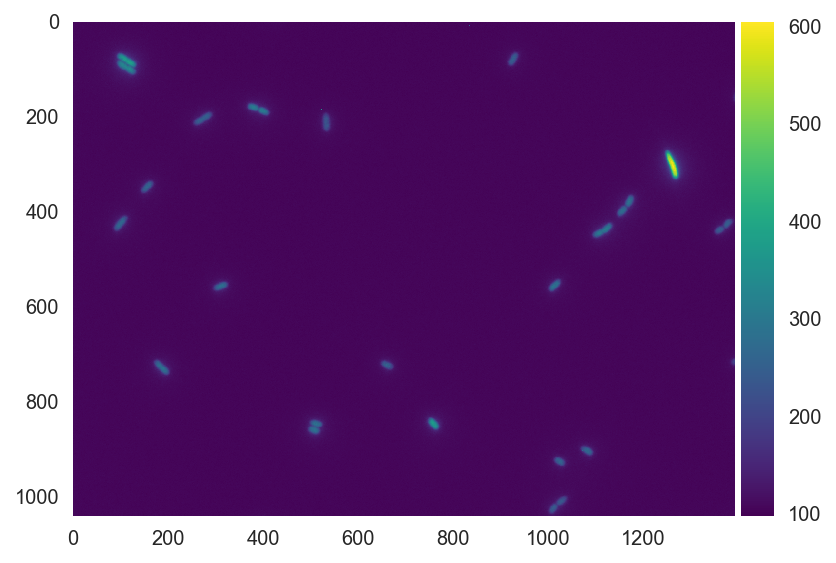

In [3]:
im_phase = skimage.io.imread('data/HG105_images/noLac_phase_0004.tif')
im_fl = skimage.io.imread('data/HG105_images/noLac_FITC_0004.tif')
with sns.axes_style('dark'):
    skimage.io.imshow(im_fl)

print(type(im_phase))

In [3]:
selem = skimage.morphology.square(3)
im_phase_filt = skimage.filters.median(im_phase, selem)
im_fl_filt = skimage.filters.median(im_fl, selem)

/Users/arman/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


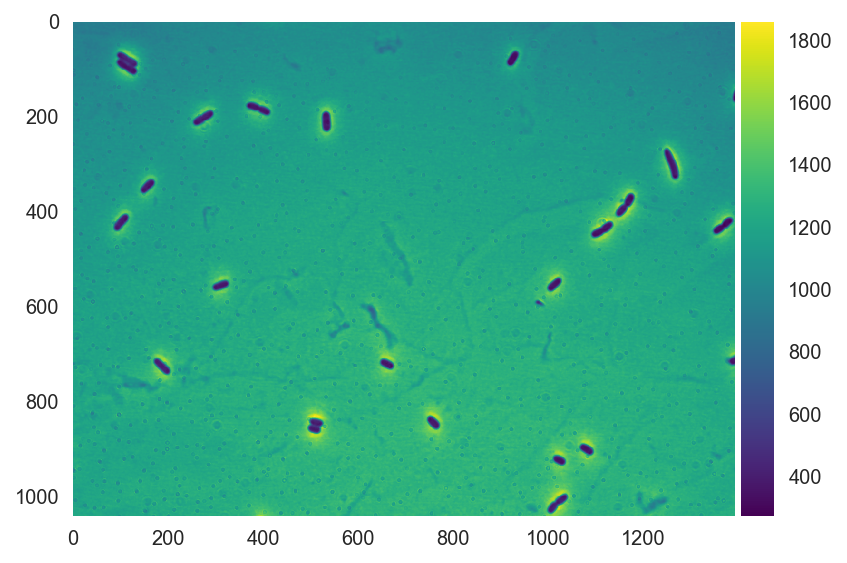

In [4]:
with sns.axes_style('dark'):
    skimage.io.imshow(im_phase_filt)

/Users/arman/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


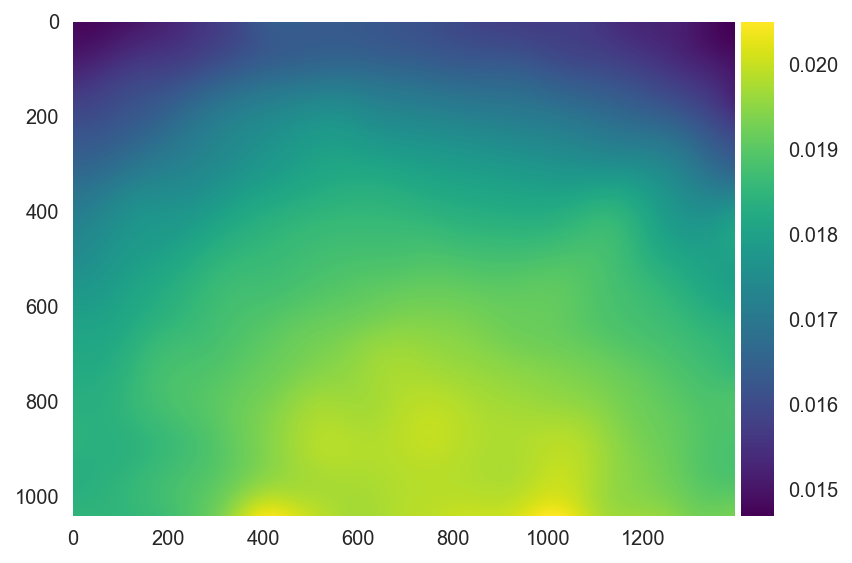

In [5]:
im_phase_bg = skimage.filters.gaussian(im_phase_filt, 50.0)

with sns.axes_style('dark'):
    skimage.io.imshow(im_phase_bg)

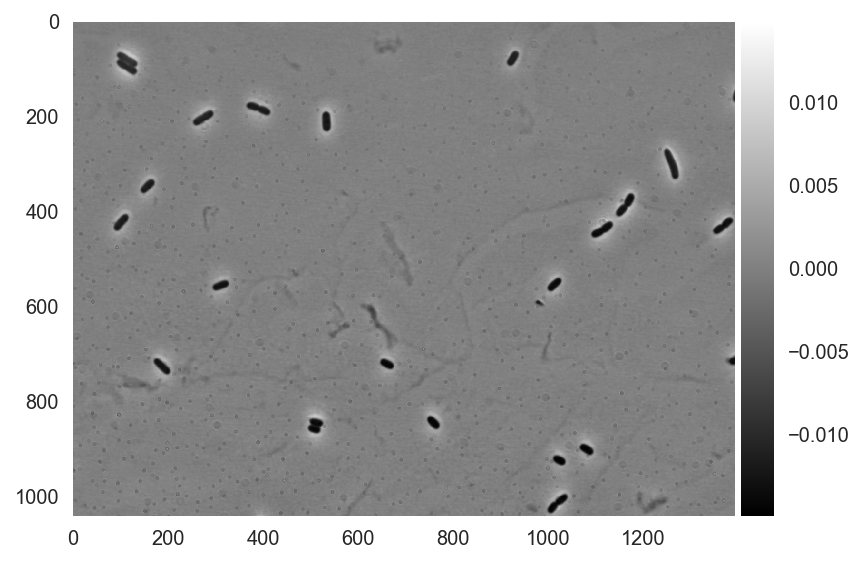

In [25]:
im_phase_sub = skimage.img_as_float(im_phase_filt) - im_phase_bg

with sns.axes_style('dark'):
    skimage.io.imshow(im_phase_sub, cmap=plt.cm.gray)

In [22]:
thresh_otsu = skimage.filters.threshold_otsu(im_phase_sub)

im_bw = im_phase_sub < thresh_otsu


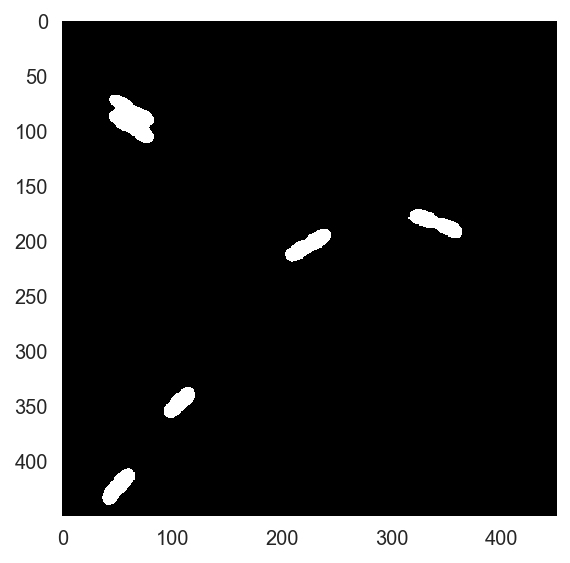

In [24]:
slc = np.s_[0:450, 50:500]
with sns.axes_style('dark'):
    skimage.io.imshow(im_bw[slc], cmap=plt.cm.gray)

In [ ]:
int_intensity = [prop.area * prop.mean_intensity for prop in improps]